<a href="https://colab.research.google.com/github/asaane88/My_project/blob/master/AutoNLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autoviml

     |████████████████████████████████| 102kB 6.0MB/s 
     |████████████████████████████████| 64.8MB 65kB/s 
     |████████████████████████████████| 133kB 53.7MB/s 


In [2]:
import  tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset, info = tfds.load('amazon_us_reviews/Personal_Care_Appliances_v1_00', with_info= True,  batch_size=-1)
train_dataset = dataset['train']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0.incompleteD803ZN/amazon_us_reviews-train.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0. Subsequent calls will reuse this data.


In [4]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [0]:
dataset = tfds.as_numpy(train_dataset)

In [6]:
dataset

{'data': {'customer_id': array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
         b'35596948', b'29430209'], dtype=object),
  'helpful_votes': array([0, 3, 0, ..., 0, 0, 0], dtype=int32),
  'marketplace': array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object),
  'product_category': array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
        dtype=object),
  'product_id': array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
         b'B000NURPPK', b'B001EY5GNW'], dtype=object),
  'product_parent': array([b'997683625', b'955577225', b'120764066', ..., b'96066145',
         b'58591097', b'986877728'], dtype=object),
  'product_title': array([b'SE - Reading Glass - Spring Loaded Hinges, 4.0x - RTS62400',
         b'Straight Razor',
         b'Philips Sonicare Flexcare & Healthy White Plastic

In [0]:
helpful_votes=dataset['data']['helpful_votes']
review_headline=dataset['data']['review_headline']
review_body=dataset['data']['review_body']
rating=dataset['data']['star_rating']

In [0]:
reviews_df=pd.DataFrame(np.hstack((helpful_votes[:,None],review_headline[:,None],review_body[:,None],rating[:,None])),columns=['votes','headline','reviews','rating'])

In [0]:
convert_dict = {'votes': int, 
                'headline': str,
                'reviews': str,
                'rating': int
               }

In [0]:
reviews_df = reviews_df.astype(convert_dict)

In [11]:
reviews_df

,votes,headline,reviews,rating
0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4
1,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5
2,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4
3,0,b'Five Stars',b'Top quality.',5
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3
...,...,...,...,...
85976,2,b'YES!',"b""This is the real deal. Don't bother with the...",5
85977,1,b'Bryton Picks',b'I like the Bryton Picks very much. Have orde...,5
85978,0,b'Trimmer Not Working',"b""I have had a Remington before but needed a n...",3
85979,0,b'Loud and ineffectual',"b""I was surprised that it really didn't do muc...",2


In [0]:
reviews_df["target"] = reviews_df["rating"].apply(lambda x: 1 if x>= 4 else 0)

In [13]:
reviews_df

,votes,headline,reviews,rating,target
0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4,1
1,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5,1
2,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4,1
3,0,b'Five Stars',b'Top quality.',5,1
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3,0
...,...,...,...,...,...
85976,2,b'YES!',"b""This is the real deal. Don't bother with the...",5,1
85977,1,b'Bryton Picks',b'I like the Bryton Picks very much. Have orde...,5,1
85978,0,b'Trimmer Not Working',"b""I have had a Remington before but needed a n...",3,0
85979,0,b'Loud and ineffectual',"b""I was surprised that it really didn't do muc...",2,0


In [14]:
reviews_df.shape[0]

85981

In [15]:
reviews_df["target"].value_counts()

1    62554
0    23427
Name: target, dtype: int64

In [16]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85981 entries, 0 to 85980
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   votes     85981 non-null  int64 
 1   headline  85981 non-null  object
 2   reviews   85981 non-null  object
 3   rating    85981 non-null  int64 
 4   target    85981 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.3+ MB


In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(reviews_df, test_size=0.25)

In [18]:
from autoviml.Auto_NLP import Auto_NLP

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Imported Auto_NLP version: 0.0.34.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced-accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


Auto NLP processing on NLP Column: reviews
Shape of Train Data: 64485 rows
    Shape of Test Data: 21496 rows


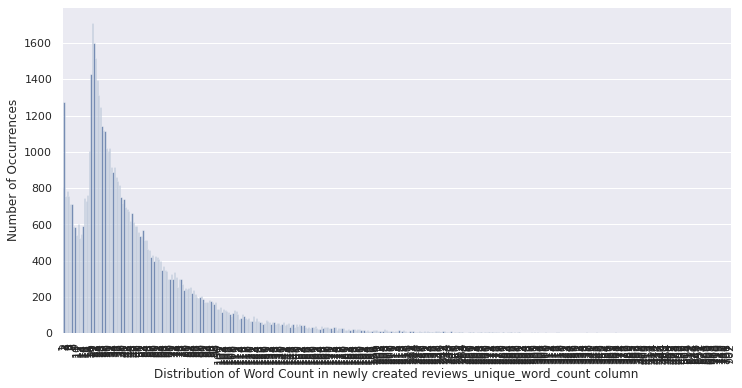

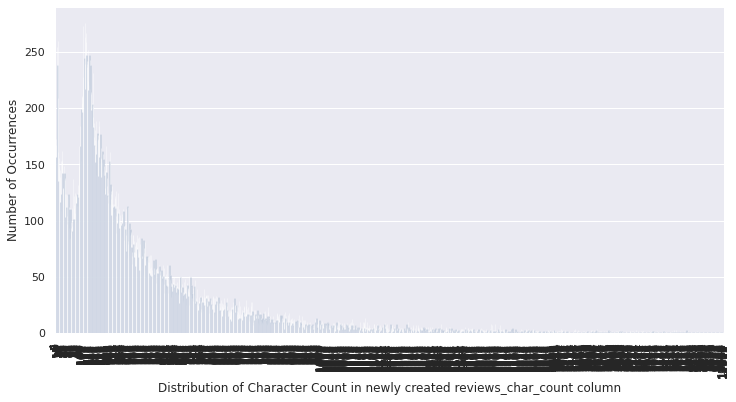

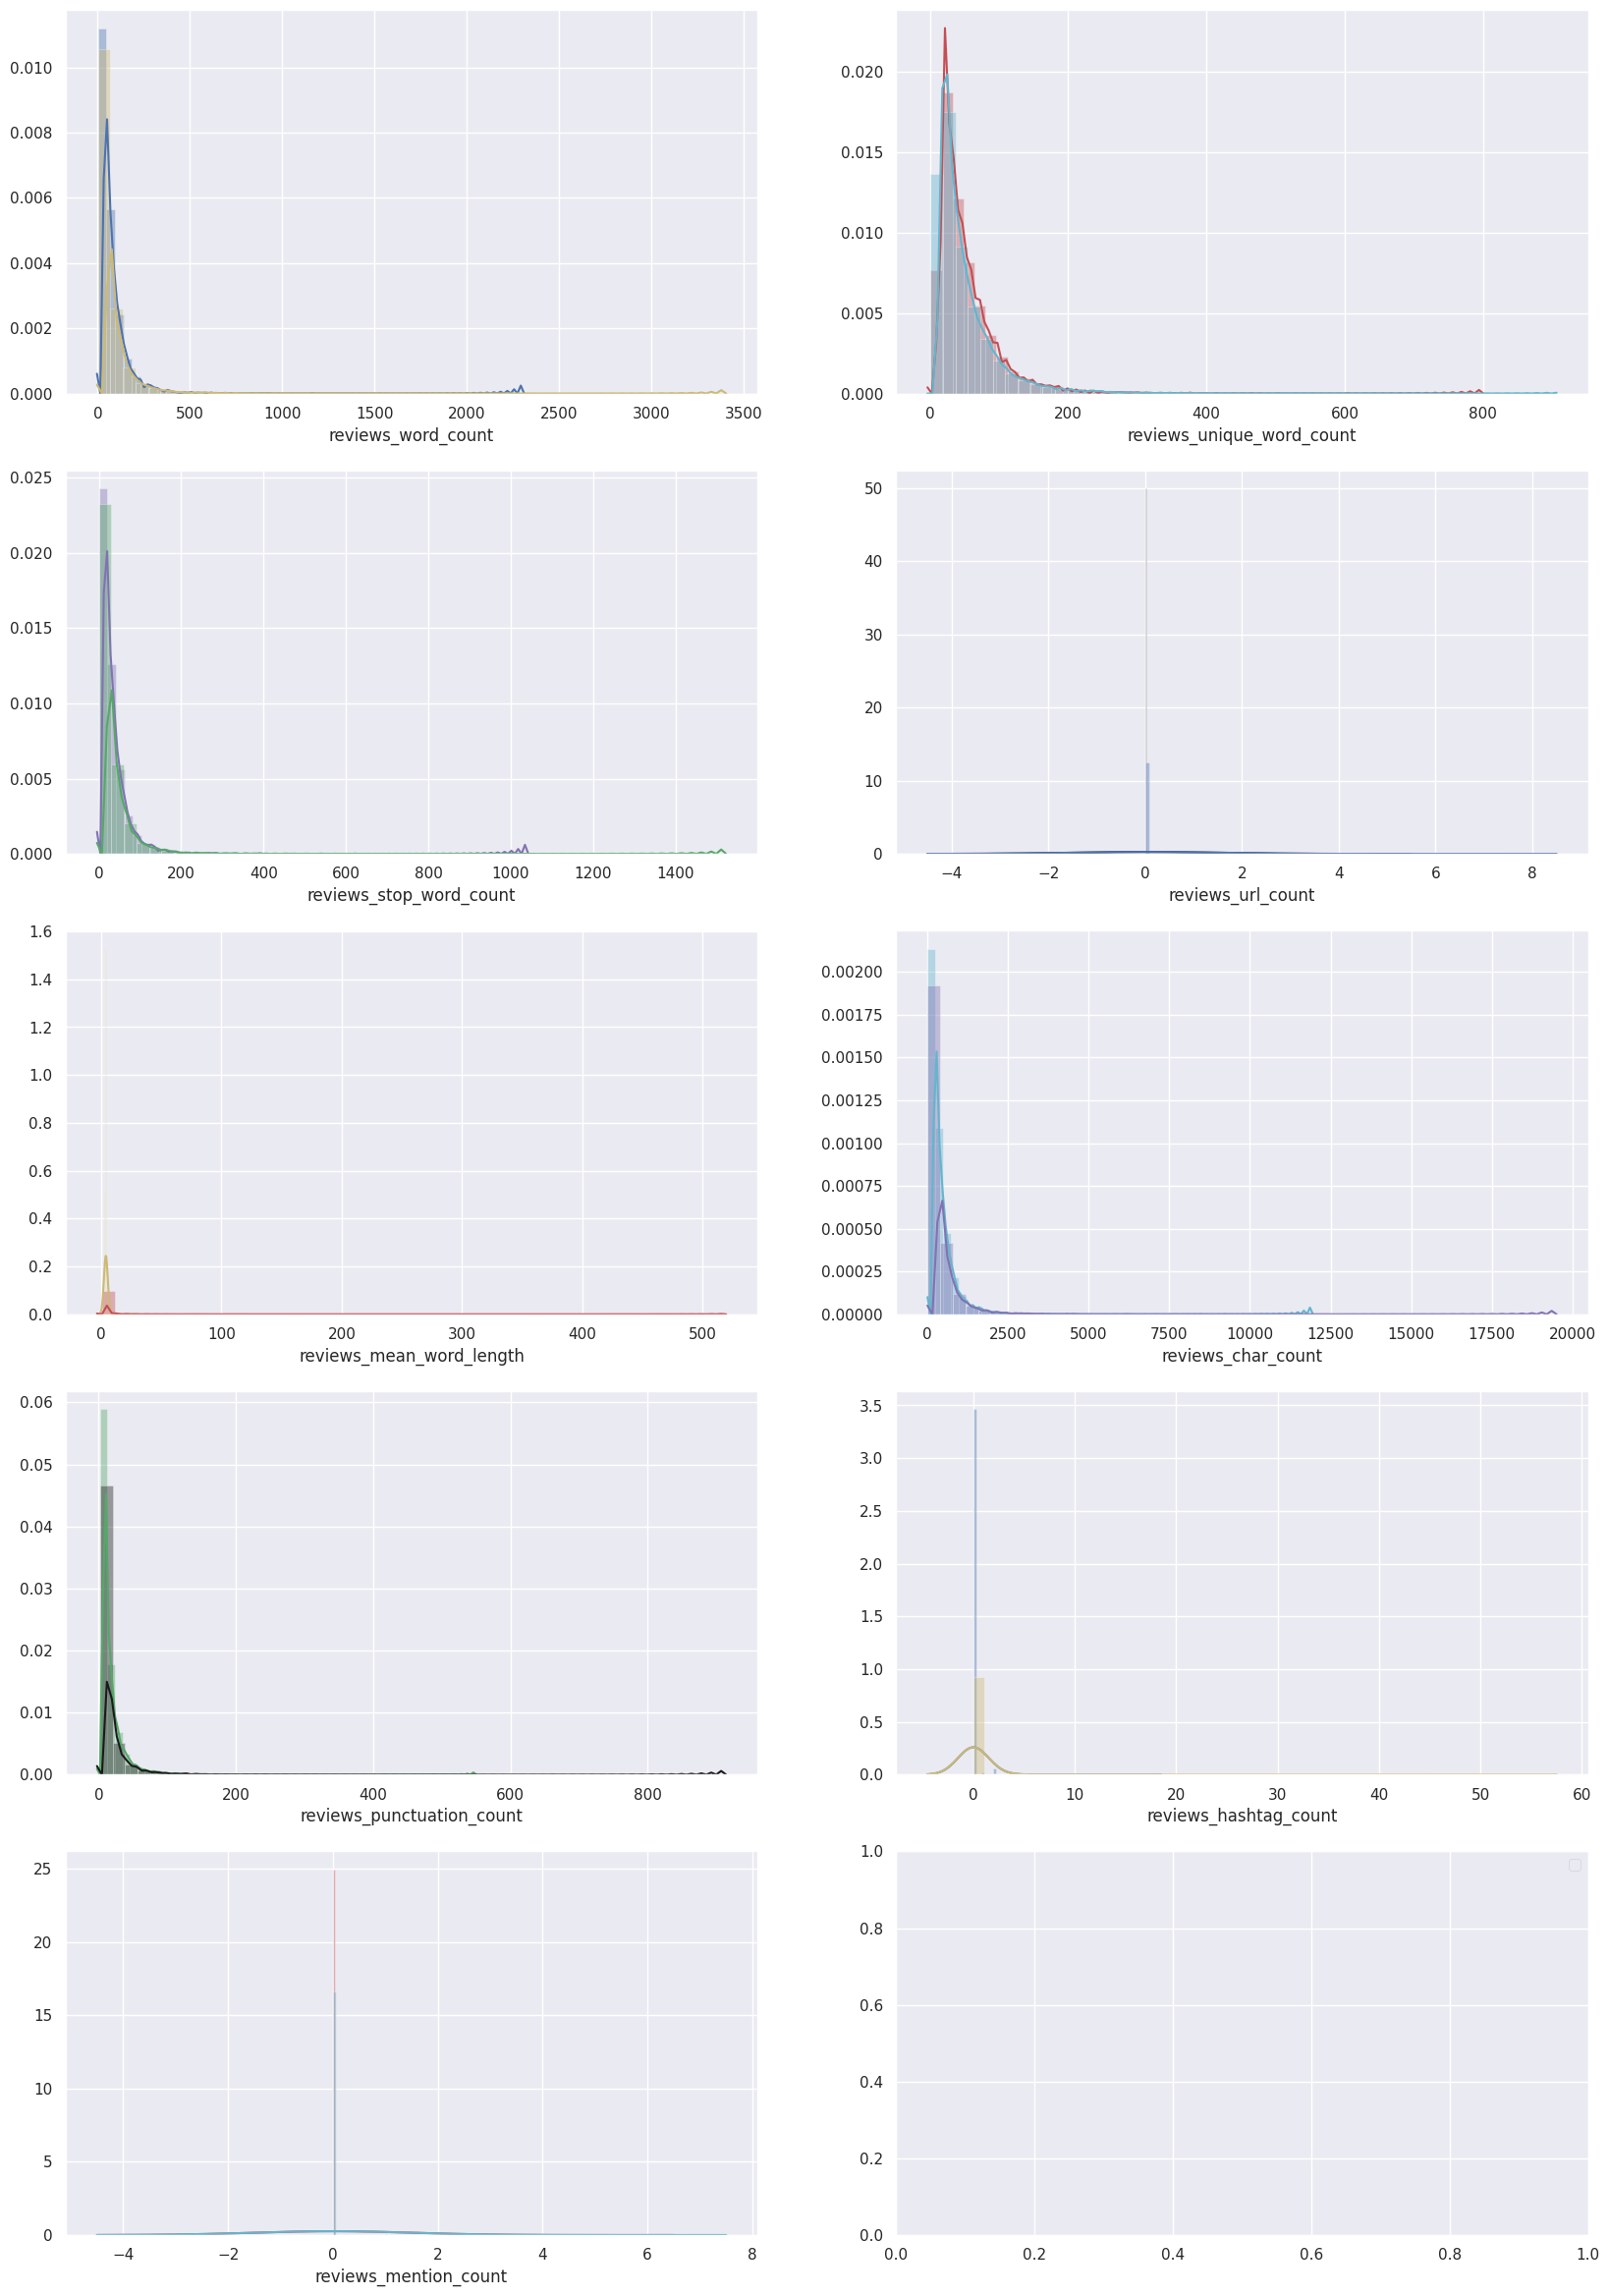

    Added 9 summary columns for counts of words and characters in each row
    Cleaning text in reviews before doing transformation...
Cleaning text in Train data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Train data = 10 seconds
        Time Taken for Processing text in Train data = 289 seconds
            Time Taken for Stopword removal in Train data = 24 seconds
    Cleaning text in reviews before doing transformation...
Cleaning text in Test data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Test data = 3 seconds
        Time Taken for Processing text in Test data = 98 seconds
            Time Taken for Stopword removal in Test data = 8 seconds
Train and Test data Text cleaning completed. Time taken = 109 seconds
    A U T O - N L P   P R O C E S S I N G  O N   N L P   C O L U M N = reviews 
#################################################################################
Generating n

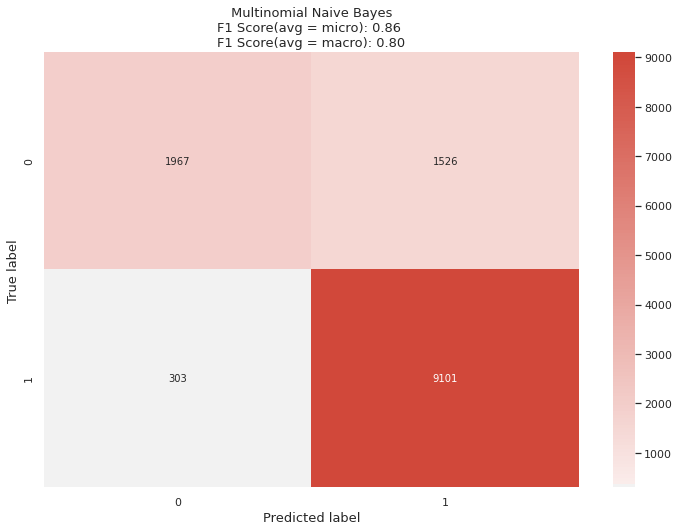

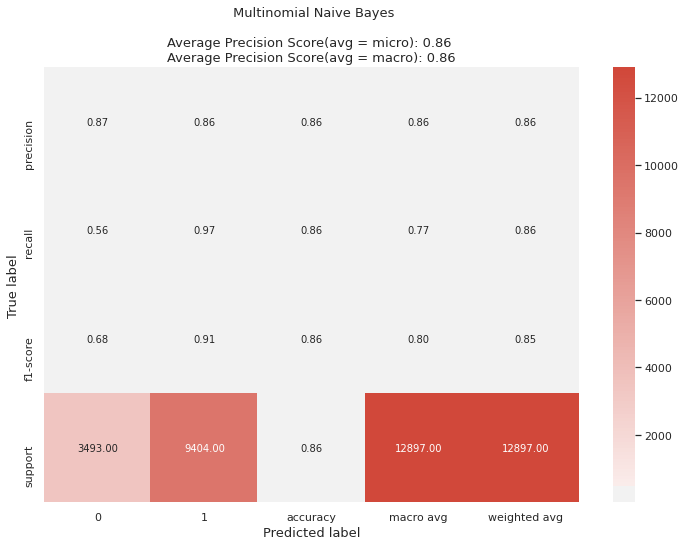

Training Pipeline on full Train data. This will take time...
    Time taken to train Pipeline on full Train shape ((64485,)) and test on ((21496, 14)) = 21.51 seconds
Time taken for Auto_NLP = 12.2 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [19]:
nlp_column = 'reviews'
target = 'target'
train_nlp, test_nlp, nlp_transformer, preds = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=50, verbose=2,
                build_model=True)

In [20]:
nlp_transformer

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.5, max_features=4846,
                                 min_df=2, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents='unicode',
                                 sublinear_tf=True, token_pattern='\\w{1,}',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=0.006825733043655191, class_prior=None,
                               fit_prior=True))],
         verbose=False)

In [21]:
nlp_transformer.predict(test[nlp_column])

array([1, 1, 1, ..., 0, 1, 1])

In [23]:
nlp_transformer

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.5, max_features=4846,
                                 min_df=2, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents='unicode',
                                 sublinear_tf=True, token_pattern='\\w{1,}',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=0.006825733043655191, class_prior=None,
                               fit_prior=True))],
         verbose=False)